## Python project

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Drop Unnamed Column

In [7]:
df = df.drop("Unnamed: 0", axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


### Change Weekly Study hours

In [8]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


##                                                    Gender Distribution

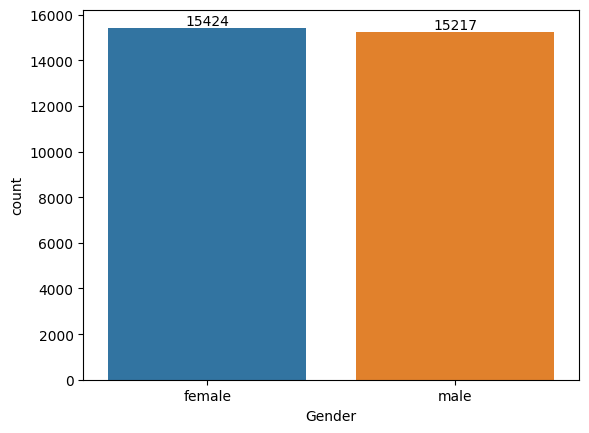

In [16]:
colors = ['#1f77b4', '#ff7f0e']
ax = sns.countplot(data = df, x="Gender",hue="Gender", palette=colors, dodge=False)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('gender_countplot.png')
plt.show()

##### From the above chart we have analyzed that:
##### The number of females in data is more tha number of males.

# Impact of Parent's Education on Student Score

In [17]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


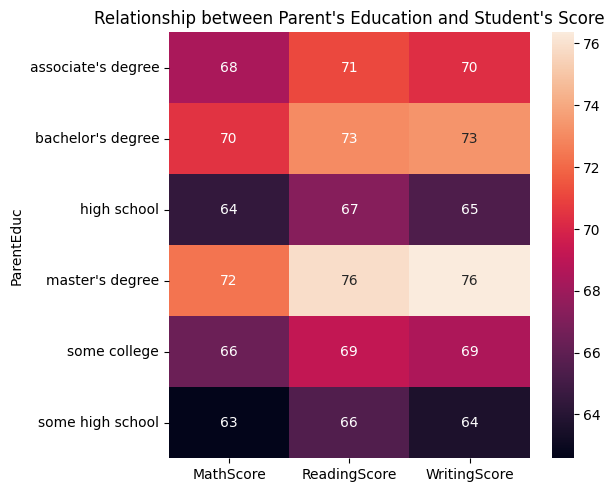

In [36]:

sns.heatmap(gb, annot=True)
plt.tight_layout()
plt.title("Relationship between Parent's Education and Student's Score")
plt.savefig('ImpactofParentEducation.png')

##### From the chart we have analyzed that the education of the parents have a good impact on their scores

# Impact of Parent's Marital Status on Student Score

In [24]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


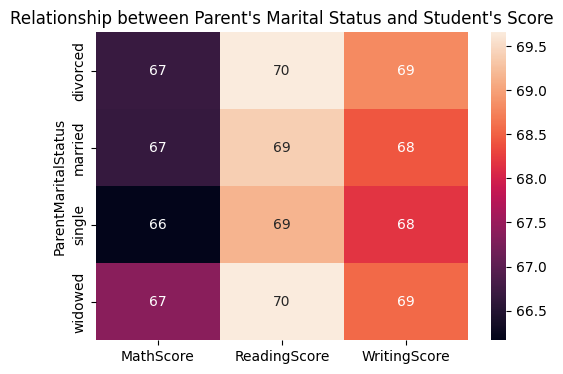

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(gb1, annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.xticks(rotation=0)
plt.savefig('ImpactofParentMaritalStatus.png')

##### From the above chart we have concluded that there is no/negligible impact on the
##### student's score due to their parent's marital status.

In [37]:
gb2 = df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb2)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


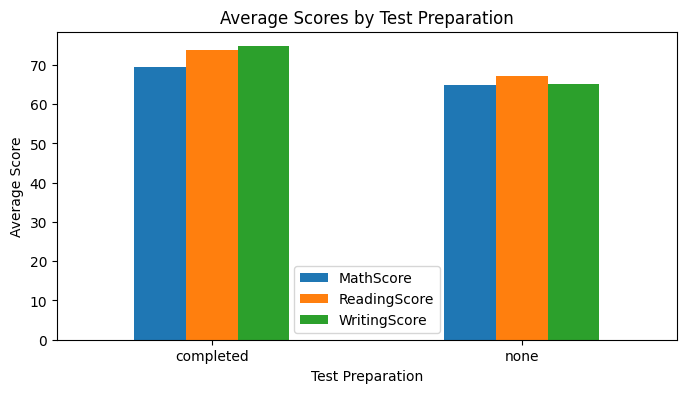

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))
gb2.plot(kind='bar', ax=ax)

# Set title and labels
ax.set_title('Average Scores by Test Preparation')
ax.set_ylabel('Average Score')
ax.set_xlabel('Test Preparation')
plt.xticks(rotation=0)
plt.show()

##### The chart indicates that students who participated in the test preparation program generally achieved higher average scores in Math, Reading, and Writing compared to those who did not participate, with the most significant improvement observed in Writing scores. This suggests that the test preparation program is effective in enhancing academic performance across multiple subjects.

In [43]:
gb3 = df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


(array([0, 1, 2]),
 [Text(0, 0, 'never'), Text(1, 0, 'regularly'), Text(2, 0, 'sometimes')])

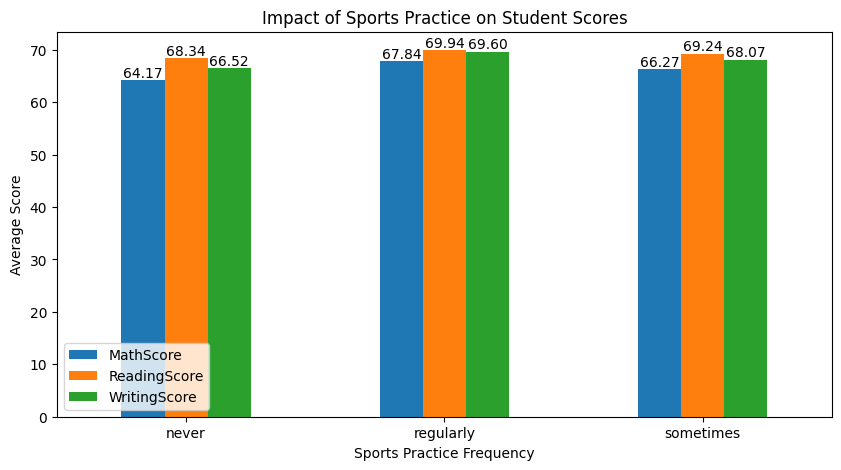

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
gb3.plot(kind='bar', ax=ax)
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Set title and labels
ax.set_title('Impact of Sports Practice on Student Scores')
ax.set_ylabel('Average Score')
ax.set_xlabel('Sports Practice Frequency')
plt.xticks(rotation=0)

##### Sports positively impact academic performance. Regular and occasional participation correlates with higher scores in Math, Reading, and Writing, enhancing cognitive function and concentration. Conversely, lack of sports correlates with lower academic performance, highlighting the importance of physical activity for students' overall development.

# Distribution of Ethinic Group

In [12]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


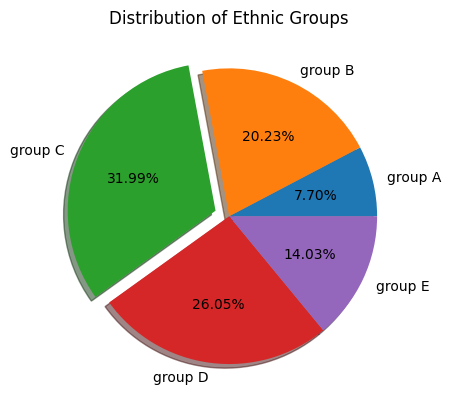

In [14]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

l = ["group A", "group B","group C","group D","group E"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
explode = [0, 0, 0.1, 0, 0] 
plt.pie(mlist, labels=l, autopct="%1.2f%%",explode = explode,shadow=True)
plt.title('Distribution of Ethnic Groups')
plt.show()

In [15]:
print(df["WklyStudyHours"].unique())

['< 5' '5 - 10' '> 10' nan]


C:\Users\Kishan Kumar\AppData\Local\Temp\ipykernel_2632\3553322666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WklyStudyHoursNum', y='mean', data=avg_scores, palette='viridis')


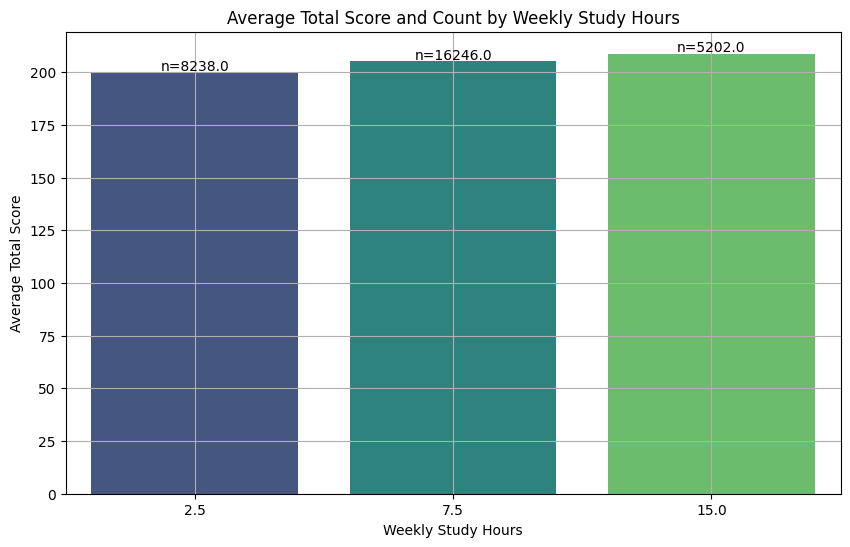

In [19]:
# Calculate the average total score and count for each category of weekly study hours
avg_scores = df.groupby('WklyStudyHoursNum')['TotalScore'].agg(['mean', 'count']).reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='WklyStudyHoursNum', y='mean', data=avg_scores, palette='viridis')
plt.title('Average Total Score and Count by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Total Score')
plt.grid(True)

# Annotate bars with count information
for index, row in avg_scores.iterrows():
    plt.text(index, row['mean'] + 1, f'n={row["count"]}', ha='center', color='black')

plt.show()